인공지능개론 #Homework 1
=======
간단한 XOR Table을 학습하는 NN 을 구성하는 문제입니다.

-  1-Layer, 2-Layer model을 각각 구성하여 XOR 결과를 비교합니다.
- 1-Layer, 2-Layer의 model을 Back propagation을 이용하여 학습시킵니다.
-  주어진 양식을 활용해 주시며, scale, 차원의 순서, hyper parameter등은 결과가 잘 나오는 방향으로 Tuning하셔도 무방합니다.
-  Layer의 Activation 함수 Sigmoid는 5번째 셀(cell)의 함수를 사용하시면 됩니다.
-  결과 재현을 위해 Weight,bias 값을 저장하여 함께 첨부해 주시기 바랍니다.
-  각 모델에서 loss 그래프와 testing step을 첨부하여 간단하게 자유 양식 결과 보고서(2~3장 내외)로 작성해 주세요.


* python으로 코드를 작성하는 경우, 양식에서 활용하는 라이브러리 외에 추가로 import 하여 사용하실 수 없습니다.

In [417]:
## 이 외에 추가 라이브러리 사용 금지
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [418]:
# Hyper parameters
# 학습의 횟수와 Gradient update에 쓰이는 learning rate입니다.
# 다른 값을 사용하여도 무방합니다.

epochs = 30000
learning_rate = 0.05

In [419]:
# Input data setting
# XOR data 
# 입력 데이터들, XOR Table 에 맞게 정의되어 있습니다.
train_inp = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
train_out = np.array([0, 1, 1, 0])

In [420]:
# Weight Setting
# 학습에 사용되는 Weigth 들의 초기값을 선언해 줍니다. 다른 값을 사용하여도 무방합니다.

W1 = np.random.randn(2,10)
W2 = np.random.randn(10,1)
b1 = np.random.randn(1,10)
b2 = np.random.randn(1,1)

In [421]:
##-----------------------------------##
##------- Activation Function -------##
##-----------------------------------##

def sigmoid(x):          
    return 1 / (np.exp(-x)+1)


In [422]:
# ----------------------------------- #
# --------- Training Step ----------- #
# ----------------------------------- #
# 학습이 시작됩니다.
# epoch 사이즈만큼 for 문을 통해 학습됩니다.
# 빈 칸을 채워 Weight과 bias를 학습하는 신경망을 설계하세요.
# 양식의 모든 내용을 무조건 따를 필요는 없습니다. 각자에게 편하게 수정하셔도 좋습니다.

errors = []
for epoch in range(epochs):
        
    # 데이터 4가지 중 랜덤으로 하나 선택
    for batch in range(4):
        idx = random.randint(0,3)

        # 입력 데이터 xin과 해당하는 정답 ans 불러오기
        xin = train_inp[idx].reshape(1,2)
        ans = train_out[idx]
        
        # Layer에 맞는 Forward Network 구성
        # HINT: 1-layer의 경우 x1만, 2-layer의 경우 x2까지 사용하시면 됩니다.
        x1 = sigmoid(xin.dot(W1)+b1)
        x2 = sigmoid(x1.dot(W2)+b2)

        # Binary Corss Entropy(BCE)로 loss 계산
        loss = -1 * (ans * np.log(x2) + (1-ans) * np.log(1-x2))
        # Weight 초기값을 설정(다른 방법으로 이용하셔도 됩니다.)
        delta_W1 = np.zeros((2,10))
        delta_W2 = np.zeros((10,1))
        delta_b1 = np.zeros((1,10))
        delta_b2 = np.zeros((1,1))
        
        # Back propagation을 통한 Weight의 Gradient update step

        BCELoss=(x2-ans)*x2*(1-x2)
        delta_W2 = x1.T.dot(BCELoss)
        delta_b2 = np.sum(BCELoss,axis=0,keepdims=True)
        delta_W1 = xin.T.dot(BCELoss.dot(W2.T)*x1*(1-x1))
        delta_b1 = np.sum(BCELoss.dot(W2.T)*x1*(1-x1),axis=0,keepdims=True)

        # 각 weight의 update 반영
        W1 = W1 - learning_rate * delta_W1
        W2 = W2 - learning_rate * delta_W2
        
        b1 = b1 - learning_rate * delta_b1
        b2 = b2 - learning_rate * delta_b2
        
        
        ## 500번째 epoch마다 loss를 프린트 합니다.
    if epoch%500 == 0:
        print("epoch[{}/{}] loss: {:.4f}".format(epoch,epochs,float(loss)))
        

    errors.append(loss)


epoch[0/30000] loss: 0.1607
epoch[500/30000] loss: 0.8694
epoch[1000/30000] loss: 0.7578
epoch[1500/30000] loss: 0.5331
epoch[2000/30000] loss: 0.4629
epoch[2500/30000] loss: 0.3287
epoch[3000/30000] loss: 0.2787
epoch[3500/30000] loss: 0.1728
epoch[4000/30000] loss: 0.1442
epoch[4500/30000] loss: 0.1554
epoch[5000/30000] loss: 0.1125
epoch[5500/30000] loss: 0.1260
epoch[6000/30000] loss: 0.1183
epoch[6500/30000] loss: 0.0738
epoch[7000/30000] loss: 0.0886
epoch[7500/30000] loss: 0.0934
epoch[8000/30000] loss: 0.0645
epoch[8500/30000] loss: 0.0828
epoch[9000/30000] loss: 0.0690
epoch[9500/30000] loss: 0.0693
epoch[10000/30000] loss: 0.0609
epoch[10500/30000] loss: 0.0669
epoch[11000/30000] loss: 0.0568
epoch[11500/30000] loss: 0.0556
epoch[12000/30000] loss: 0.0532
epoch[12500/30000] loss: 0.0423
epoch[13000/30000] loss: 0.0582
epoch[13500/30000] loss: 0.0468
epoch[14000/30000] loss: 0.0464
epoch[14500/30000] loss: 0.0519
epoch[15000/30000] loss: 0.0445
epoch[15500/30000] loss: 0.0429


Text(0, 0.5, 'loss')

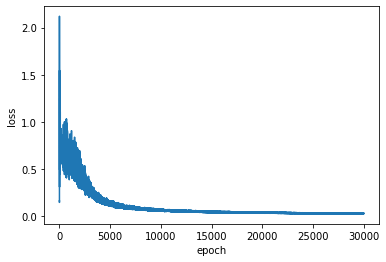

In [423]:
## 학습이 끝난 후, loss를 확인합니다.
loss =  np.array(errors)
plt.plot(loss.reshape(epochs))
plt.xlabel("epoch")
plt.ylabel("loss")

In [424]:
#-----------------------------------#
#--------- Testing Step ------------#
#-----------------------------------#

for idx in range(4):
    xin = train_inp[idx]
    ans = train_out[idx]
    
    x1 = sigmoid(np.matmul(xin,W1)+b1)
    x2 = sigmoid(np.matmul(x1,W2)+b2)

    pred = x2
    
    print("input: ", xin, ", answer: ", ans, ", pred: {:.4f}".format(float(pred)))
    

input:  [1 1] , answer:  0 , pred: 0.0297
input:  [1 0] , answer:  1 , pred: 0.9743
input:  [0 1] , answer:  1 , pred: 0.9735
input:  [0 0] , answer:  0 , pred: 0.0220


In [426]:
#-----------------------------------#
#--------- Weight Saving -----------#
#-----------------------------------#

# weight, bias를 저장하는 부분입니다.
# 학번에 자신의 학번으로 대체해 주세요.

#layer 1개인 경우
np.savetxt("20151600_layer1_weight",(W1, b1),fmt="%s")

#layer 2개인 경우
np.savetxt("20151600_layer2_weight",(W1, W2, b1, b2),fmt="%s")